In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

**Research Question 1: Is there a causal relationship between government spending in air infrastructure and accidents fatality rate in airline?**


In [2]:
data = pd.read_csv("transportation.csv")

In [3]:
fatalities = pd.read_excel("fatalities.xlsx", sheet_name= '2-14').iloc[6]

In [4]:
fatality_rate = fatalities[10:]

In [5]:
pattern = r"\d+\/\d+\/"
newdate = data['Date'].str.replace(pattern, "")
pattern2 = r"\d+\:.*"
newdate = newdate.str.replace(pattern2, "")
data['Year'] = newdate

/tmp/ipykernel_150/242202618.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  newdate = data['Date'].str.replace(pattern, "")
/tmp/ipykernel_150/242202618.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  newdate = newdate.str.replace(pattern2, "")


In [6]:
air = data[["Date","Air Safety - General Aviation Fatalities","State and Local Government Construction Spending - Air Passenger Terminal","State and Local Government Construction Spending - Air"]]

In [7]:
air = air.fillna(0)


In [8]:
air_cleaned = pd.DataFrame(columns = ["year","Aviation Fatalities","Construction Spending in Air Terminal", "Construction spending in Air"])

In [9]:
air_cleaned

,year,Aviation Fatalities,Construction Spending in Air Terminal,Construction spending in Air


In [10]:
fatalities = []
air_expense = []
air_terminal = []
for i in list(range(0,898,12)):
    fata = 0
    air_e = 0
    air_t = 0
    for j in range(13):
        fata += air.iloc[i+j][1]
        air_e += air.iloc[i+j][2]
        air_t += air.iloc[i+j][3]
    fatalities += [fata]
    air_expense += [air_e]
    air_terminal += [air_t]

air_cleaned['Aviation Fatalities'] = fatalities
air_cleaned['Construction Spending in Air Terminal'] = air_terminal
air_cleaned['Construction spending in Air'] = air_expense
            
        
    

In [11]:
air_cleaned["year"] = air_cleaned.index + 1947

In [12]:
air_cleaned["Construction spending in Air"]

0     0.000000e+00
1     0.000000e+00
2     0.000000e+00
3     0.000000e+00
4     0.000000e+00
          ...     
70    8.457000e+09
71    1.203200e+10
72    1.326500e+10
73    1.505400e+10
74    1.296700e+10
Name: Construction spending in Air, Length: 75, dtype: float64

In [13]:
air_cleaned = air_cleaned[air_cleaned["year"] > 1992]


In [14]:
after = air_cleaned["Aviation Fatalities"][1:].tolist()

In [15]:
after += [351]

In [16]:
air_cleaned["after fatalities"] = after

/tmp/ipykernel_150/1076755877.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_cleaned["after fatalities"] = after


In [17]:
air_cleaned["decrease in fatalities"] = -(air_cleaned["after fatalities"] - air_cleaned["Aviation Fatalities"])

/tmp/ipykernel_150/1133251591.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_cleaned["decrease in fatalities"] = -(air_cleaned["after fatalities"] - air_cleaned["Aviation Fatalities"])


In [18]:
air_cleaned

,year,Aviation Fatalities,Construction Spending in Air Terminal,Construction spending in Air,after fatalities,decrease in fatalities
46,1993,888.0,5.965000e+09,1.927000e+09,1134.0,-246.0
47,1994,1134.0,4.300000e+09,1.122000e+09,955.0,179.0
48,1995,955.0,4.399000e+09,1.399000e+09,1273.0,-318.0
49,1996,1273.0,5.159000e+09,1.884000e+09,785.0,488.0
50,1997,785.0,5.509000e+09,2.366000e+09,733.0,52.0
51,1998,733.0,6.104000e+09,2.435000e+09,824.0,-91.0
52,1999,824.0,6.466000e+09,2.469000e+09,856.0,-32.0
53,2000,856.0,7.120000e+09,3.109000e+09,1151.0,-295.0
54,2001,1151.0,8.370000e+09,2.961000e+09,705.0,446.0
55,2002,705.0,8.639000e+09,3.292000e+09,774.0,-69.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


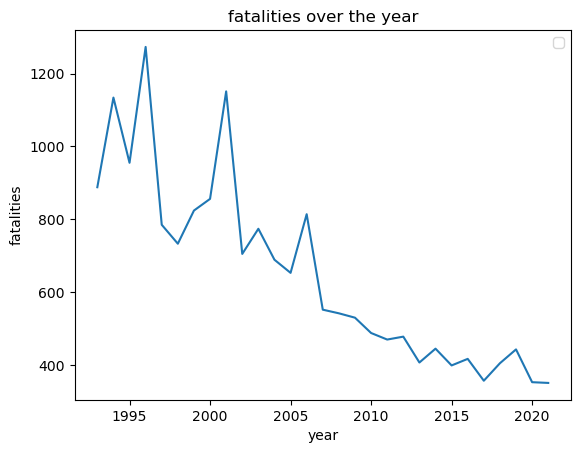

In [19]:
plt.plot(air_cleaned["year"], air_cleaned["Aviation Fatalities"])
plt.xlabel('year')
plt.ylabel('fatalities')
plt.title("fatalities over the year")
plt.legend()
plt.show()

In [20]:
accumulated_expenditure = [1927000000]
accumulated_expenditure_t = [5965000000]
for i in range(1,29):
    accumulated_expenditure += [air_cleaned["Construction spending in Air"].tolist()[i] + accumulated_expenditure[i-1]]
    accumulated_expenditure_t += [air_cleaned["Construction Spending in Air Terminal"].tolist()[i] + accumulated_expenditure_t[i-1]]
       
    
    
air_cleaned["accumulated_air_expense"] = accumulated_expenditure
air_cleaned["accumulated_air_expense_terminal"] = accumulated_expenditure_t   

    

/tmp/ipykernel_150/266247331.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_cleaned["accumulated_air_expense"] = accumulated_expenditure
/tmp/ipykernel_150/266247331.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_cleaned["accumulated_air_expense_terminal"] = accumulated_expenditure_t


In [21]:
air_cleaned.loc[air_cleaned['year'] < 1997, 'accumulated_air_expense'] = 1

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [22]:
air_cleaned.loc[(air_cleaned['year'] > 1996) & (air_cleaned['year'] <= 2002), 'accumulated_air_expense'] = 2
air_cleaned.loc[(air_cleaned['year'] > 2002) & (air_cleaned['year'] < 2007), 'accumulated_air_expense'] = 3
air_cleaned.loc[air_cleaned['year'] >= 2007 , 'accumulated_air_expense'] = 4

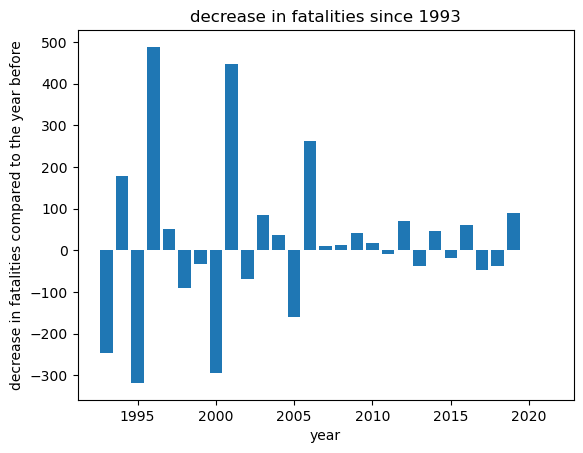

In [23]:
plt.bar(air_cleaned["year"], air_cleaned["decrease in fatalities"])
plt.title('decrease in fatalities since 1993')
plt.xlabel('year')
plt.ylabel('decrease in fatalities compared to the year before')
plt.show()

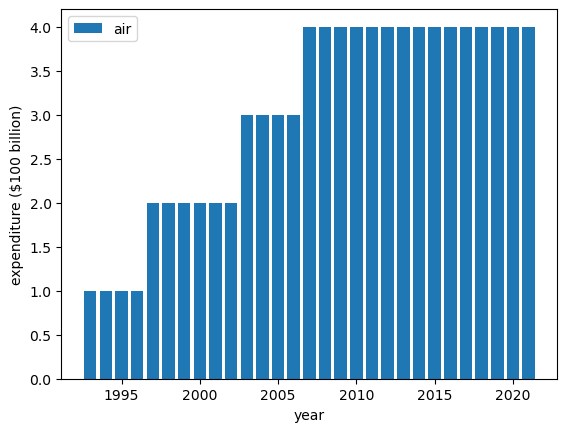

In [24]:
plt.bar(air_cleaned["year"], air_cleaned['accumulated_air_expense'], label = "air")
plt.xlabel('year')
plt.ylabel('expenditure ($100 billion)')
plt.legend()
plt.show()

We found that when State and Local Government Construction Spending on Air accumulates at a specific level, the general aviation fatalities would drop rapidly. The possible reason for that phenomena is that air infrastructures like airports, air traffic controls, and aircraft were finished building and implementing. For example, if a new airplane model which is designed to be safer under any weather conditions was funded five years ago and got updated in most airlines last year. Then there will be a great chance that the general aviation fatalities of this year drop greatly.

I first created a new dataframe called “air” which only includes the columns related to air. Then, I fill all NA as 0 and this should be fine because the NA in spending and fatalities means 0. I changed the data type of spending as integer for further calculation. Here I make a new dataframe by grouping the following data by year. In this way, I can get the total spending on air infrastructure per year and general aviation fatalities per year. Then, I dropped rows with no general aviation fatalities and named it “after”. I want to calculate the decrease in fatalities each year, so I subtract two columns and add a negative sign to show the decrease. Then, I use barplot as the visualization for decrease in fatalities. On the other hand, I use barplot to show the total expense on Construction Spending on Air and on Air terminals at the sametime. Then I combine two graphs and we can easily find that as different funding levels are reached, the fatalities will be decreased a lot.

By combining the chart of fatalities decrease and the chart of total Construction Spending on Air, the graph may suggest that as the funds reached a specific level, the fatalities would decrease tremendously. Upon my research on funding levels, the government usually reauthorizes the five-year funding plan into law. And we can see that as the plan and total spending reached that level, the decrease of fatalities are obvious. 




In [25]:
air_cleaned = air_cleaned.drop(index = 74,axis = 0)
air_cleaned['Aviation Fatalities'] = fatality_rate.to_list()
air_cleaned = air_cleaned.drop(index = 61, axis = 0)

In [26]:
air_cleaned.columns

Index(['year', 'Aviation Fatalities', 'Construction Spending in Air Terminal',
       'Construction spending in Air', 'after fatalities',
       'decrease in fatalities', 'accumulated_air_expense',
       'accumulated_air_expense_terminal'],
      dtype='object')

In [27]:
air_casual = air_cleaned[['year','Construction spending in Air',"Aviation Fatalities"]]
air_casual

,year,Construction spending in Air,Aviation Fatalities
46,1993,1.927000e+09,3.26373
47,1994,1.122000e+09,3.283112
48,1995,1.399000e+09,2.947081
49,1996,1.884000e+09,2.556167
50,1997,2.366000e+09,2.464844
51,1998,2.435000e+09,2.445429
52,1999,2.469000e+09,2.123367
53,2000,3.109000e+09,2.140958
54,2001,2.961000e+09,2.213921
55,2002,3.292000e+09,2.274418


In [28]:
air_casual['log_expenditure'] = np.log(air_casual['Construction spending in Air'])
air_casual

/tmp/ipykernel_150/385335155.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_casual['log_expenditure'] = np.log(air_casual['Construction spending in Air'])


,year,Construction spending in Air,Aviation Fatalities,log_expenditure
46,1993,1.927000e+09,3.26373,21.379230
47,1994,1.122000e+09,3.283112,20.838379
48,1995,1.399000e+09,2.947081,21.059024
49,1996,1.884000e+09,2.556167,21.356663
50,1997,2.366000e+09,2.464844,21.584467
51,1998,2.435000e+09,2.445429,21.613213
52,1999,2.469000e+09,2.123367,21.627079
53,2000,3.109000e+09,2.140958,21.857567
54,2001,2.961000e+09,2.213921,21.808793
55,2002,3.292000e+09,2.274418,21.914761


In [29]:
air_casual = air_casual.drop(index=64,axis = 1)
air_casual = air_casual.drop(columns = ['Construction spending in Air'],axis = 0)

In [30]:
air_casual

,year,Aviation Fatalities,log_expenditure
46,1993,3.26373,21.379230
47,1994,3.283112,20.838379
48,1995,2.947081,21.059024
49,1996,2.556167,21.356663
50,1997,2.464844,21.584467
51,1998,2.445429,21.613213
52,1999,2.123367,21.627079
53,2000,2.140958,21.857567
54,2001,2.213921,21.808793
55,2002,2.274418,21.914761


In [31]:
def compute_lagged_fatalities(data,year):
    lagged = data['Aviation Fatalities'].iloc[year:].to_list()
    lagged += [0]*year
    data['lagged_fatatility_rate'+ str(year)] = lagged
    return data
compute_lagged_fatalities(air_casual, 2)

,year,Aviation Fatalities,log_expenditure,lagged_fatatility_rate2
46,1993,3.26373,21.379230,2.947081
47,1994,3.283112,20.838379,2.556167
48,1995,2.947081,21.059024,2.464844
49,1996,2.556167,21.356663,2.445429
50,1997,2.464844,21.584467,2.123367
51,1998,2.445429,21.613213,2.140958
52,1999,2.123367,21.627079,2.213921
53,2000,2.140958,21.857567,2.274418
54,2001,2.213921,21.808793,2.434896
55,2002,2.274418,21.914761,2.246062


In [32]:
air_casual = air_casual[['year','log_expenditure','lagged_fatatility_rate2']].drop(index= [72,73])

**Using Outcome Regression**

In [33]:
GDP = pd.read_csv("GDP.csv")
air_casual["log_GDP"] = np.log(GDP["GDP"][:air_casual.shape[0]]).to_list()
air_casual

,year,log_expenditure,lagged_fatatility_rate2,log_GDP
46,1993,21.379230,2.947081,8.833253
47,1994,20.838379,2.556167,8.893880
48,1995,21.059024,2.464844,8.941120
49,1996,21.356663,2.445429,8.996296
50,1997,21.584467,2.123367,9.056904
51,1998,21.613213,2.140958,9.111935
52,1999,21.627079,2.213921,9.172760
53,2000,21.857567,2.274418,9.235126
54,2001,21.808793,2.434896,9.266903
55,2002,21.914761,2.246062,9.299185


In [34]:
air_casual["year_effect"] = air_casual["year"] - 1992

Text(0, 0.5, 'fatality')

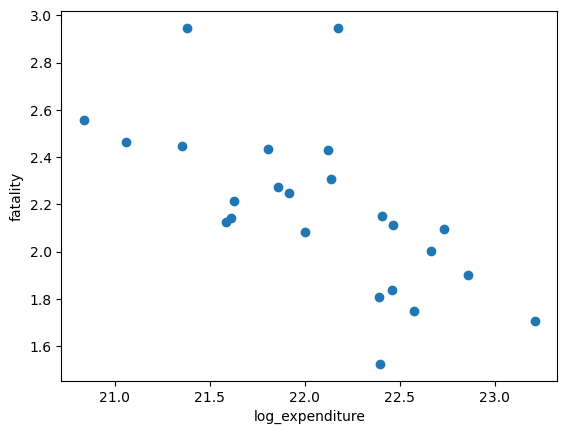

In [35]:
plt.scatter(air_casual['log_expenditure'],air_casual['lagged_fatatility_rate2'])
plt.xlabel("log_expenditure")
plt.ylabel("fatality")

In [36]:
linear_model = sm.formula.ols("lagged_fatatility_rate2 ~ log_expenditure",
                          data = air_casual).fit()
print(linear_model.summary())

                               OLS Regression Results                              
Dep. Variable:     lagged_fatatility_rate2   R-squared:                       0.416
Model:                                 OLS   Adj. R-squared:                  0.390
Method:                      Least Squares   F-statistic:                     15.69
Date:                     Mon, 12 Dec 2022   Prob (F-statistic):           0.000663
Time:                             22:24:39   Log-Likelihood:                -2.0507
No. Observations:                       24   AIC:                             8.101
Df Residuals:                           22   BIC:                             10.46
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

In [37]:
linear_model_2 = sm.formula.ols("lagged_fatatility_rate2 ~ log_expenditure + log_GDP + year_effect",
                          data = air_casual).fit()
print(linear_model_2.summary())

                               OLS Regression Results                              
Dep. Variable:     lagged_fatatility_rate2   R-squared:                       0.637
Model:                                 OLS   Adj. R-squared:                  0.582
Method:                      Least Squares   F-statistic:                     11.69
Date:                     Mon, 12 Dec 2022   Prob (F-statistic):           0.000121
Time:                             22:24:39   Log-Likelihood:                 3.6433
No. Observations:                       24   AIC:                            0.7134
Df Residuals:                           20   BIC:                             5.426
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

Given our assumptions are true, our estimated treatment effect of governemnt spending on air fatality rates in 2 years is -0.511. There exists a negative causal relationship.

**Add more confounding variables**

In [38]:
gas = pd.read_csv("gas.csv")

In [39]:
gas = pd.read_csv("gas.csv")
air_casual["gas"] = gas["GASREGW"][:air_casual.shape[0]].to_list()

In [40]:
air_casual

,year,log_expenditure,lagged_fatatility_rate2,log_GDP,year_effect,gas
46,1993,21.379230,2.947081,8.833253,1,1.067308
47,1994,20.838379,2.556167,8.893880,2,1.074654
48,1995,21.059024,2.464844,8.941120,3,1.110865
49,1996,21.356663,2.445429,8.996296,4,1.199075
50,1997,21.584467,2.123367,9.056904,5,1.199038
51,1998,21.613213,2.140958,9.111935,6,1.029654
52,1999,21.627079,2.213921,9.172760,7,1.135808
53,2000,21.857567,2.274418,9.235126,8,1.483808
54,2001,21.808793,2.434896,9.266903,9,1.420057
55,2002,21.914761,2.246062,9.299185,10,1.344500


In [41]:
linear_model_2 = sm.formula.ols("lagged_fatatility_rate2 ~ log_expenditure + log_GDP + gas + year_effect",
                          data = air_casual).fit()
print(linear_model_2.summary())

                               OLS Regression Results                              
Dep. Variable:     lagged_fatatility_rate2   R-squared:                       0.637
Model:                                 OLS   Adj. R-squared:                  0.560
Method:                      Least Squares   F-statistic:                     8.333
Date:                     Mon, 12 Dec 2022   Prob (F-statistic):           0.000466
Time:                             22:24:40   Log-Likelihood:                 3.6471
No. Observations:                       24   AIC:                             2.706
Df Residuals:                           19   BIC:                             8.596
Df Model:                                4                                         
Covariance Type:                 nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

**inverse propensity weight**

step 1: modelling the treatment 

In [50]:
g_x = sm.formula.ols("log_expenditure ~ log_GDP + gas + year_effect",
                          data = air_casual).fit()
print(g_x.summary())

                            OLS Regression Results                            
Dep. Variable:        log_expenditure   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     69.12
Date:                Mon, 12 Dec 2022   Prob (F-statistic):           9.85e-11
Time:                        23:08:58   Log-Likelihood:                 8.4096
No. Observations:                  24   AIC:                            -8.819
Df Residuals:                      20   BIC:                            -4.107
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.6796      6.088      0.276      

In [43]:
density = stats.norm(loc = g_x.fittedvalues, scale = g_x.resid.std() )
densities = density.pdf(air_casual["log_expenditure"])
densities = pd.Series(densities, index = g_x.fittedvalues.index)
#balancing weights
weights = 1 / densities
weights 

46    4.993938
47    1.733269
48    0.691412
49    0.440279
50    0.546943
51    0.436515
52    0.526440
53    0.449748
54    0.494074
55    0.467358
56    0.479585
57    0.444589
58    0.948266
59    0.666166
60    0.516367
62    5.821916
63    1.020200
65    0.453513
66    0.453380
67    0.506531
68    0.793226
69    0.558157
70    0.476442
71    0.721201
dtype: float64

In [48]:
ipw_model_base = sm.formula.wls("lagged_fatatility_rate2 ~ log_expenditure",
                          data = air_casual,
                          weights = weights).fit()
print(ipw_model_base.summary())

                               WLS Regression Results                              
Dep. Variable:     lagged_fatatility_rate2   R-squared:                       0.556
Model:                                 WLS   Adj. R-squared:                  0.536
Method:                      Least Squares   F-statistic:                     27.58
Date:                     Mon, 12 Dec 2022   Prob (F-statistic):           2.87e-05
Time:                             22:35:41   Log-Likelihood:                -7.1997
No. Observations:                       24   AIC:                             18.40
Df Residuals:                           22   BIC:                             20.76
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

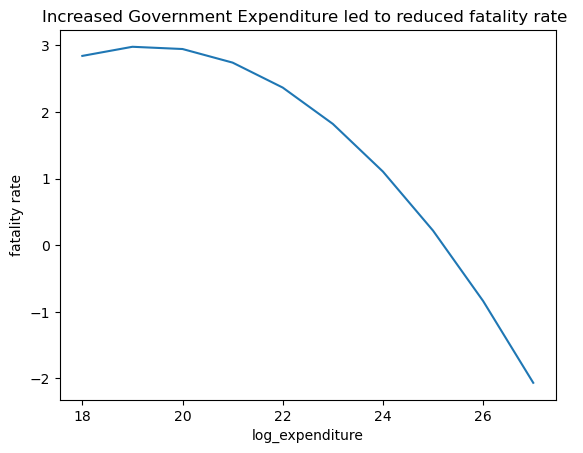

In [46]:
ipw_model = sm.formula.wls("lagged_fatatility_rate2 ~ log_expenditure + I(log_expenditure**2)",
                          data = air_casual,
                          weights = weights).fit()
set_treatment_values = list(range(18,28))
set_treatment_values = pd.DataFrame(
    data={"log_expenditure": set_treatment_values, "I(log_expenditure**2)": np.square(set_treatment_values)},
    index=set_treatment_values,
)
response = ipw_model.predict(set_treatment_values)
ax = response.plot(
    kind="line",
    xlabel="log_expenditure",
    ylabel="fatality rate",
    title="Increased Government Expenditure led to reduced fatality rate "
)